In [7]:
from facenet_pytorch import MTCNN
from PIL import Image
from matplotlib import pyplot  as plt
import numpy as np
import math

In [8]:
mtcnn = MTCNN(image_size=160,
              margin=0,
              min_face_size=20,
              thresholds=[0.6, 0.7, 0.7], # MTCNN thresholds
              factor=0.709,
              post_process=True,
              device='cpu' # If you don't have GPU
        )

In [9]:
def visualize(image, landmarks_, angle_R_, angle_L_, pred_):
    fig , ax = plt.subplots(1, 1, figsize= (10,10))
    ax.set_title("Output Image")
    for landmarks, angle_R, angle_L, pred in zip(landmarks_, angle_R_, angle_L_, pred_):
        
        if pred == 'Frontal':
            color = 'white'
        elif pred == 'Right Profile':
            color = 'blue'
        else:
            color = 'red'
            
        point1 = [landmarks[0][0], landmarks[1][0]]
        point2 = [landmarks[0][1], landmarks[1][1]]

        point3 = [landmarks[2][0], landmarks[0][0]]
        point4 = [landmarks[2][1], landmarks[0][1]]

        point5 = [landmarks[2][0], landmarks[1][0]]
        point6 = [landmarks[2][1], landmarks[1][1]]
        for land in landmarks:
            ax.scatter(land[0], land[1])
        plt.plot(point1, point2, 'y', linewidth=3)
        plt.plot(point3, point4, 'y', linewidth=3)
        plt.plot(point5, point6, 'y', linewidth=3)
        plt.text(point1[0], point2[0], f"{pred} \n {math.floor(angle_L)}, {math.floor(angle_R)}", 
                size=20, ha="center", va="center", color=color)
    ax.imshow(image)

In [10]:
# Landmaeks: [Left Eye], [Right eye], [nose], [left mouth], [right mouth]
def npAngle(a, b, c):
    ba = np.array(a) - np.array(b)
    bc = np.array(c) - np.array(b) 
    
    cosine_angle = np.dot(ba, bc)/(np.linalg.norm(ba)*np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    
    return np.degrees(angle)

In [11]:
def predFacePose(imgaePath):

    im = Image.open(imgaePath) # Reading the image
    
    if im.mode != "RGB": # Convert the image if it has more than 3 channels, because MTCNN will refuse anything more than 3 channels.
        im = im.convert('RGB')
    
    bbox_, prob_, landmarks_ = mtcnn.detect(im, landmarks=True) # The detection part producing bounding box, probability of the detected face, and the facial landmarks
    angle_R_List = []
    angle_L_List = []
    predLabelList = []
    
    for bbox, landmarks, prob in zip(bbox_, landmarks_, prob_):
        if bbox is not None: # To check if we detect a face in the image
            if prob > 0.9: # To check if the detected face has probability more than 90%, to avoid 
                angR = npAngle(landmarks[0], landmarks[1], landmarks[2]) # Calculate the right eye angle
                angL = npAngle(landmarks[1], landmarks[0], landmarks[2])# Calculate the left eye angle
                angle_R_List.append(angR)
                angle_L_List.append(angL)
                if ((int(angR) in range(35, 57)) and (int(angL) in range(35, 58))):
                    predLabel='Frontal'
                    predLabelList.append(predLabel)
                else: 
                    if angR < angL:
                        predLabel='Left Profile'
                    else:
                        predLabel='Right Profile'
                    predLabelList.append(predLabel)
            else:
                print('The detected face is Less then the detection threshold')
        else:
            print('No face detected in the image')
    visualize(im, landmarks_, angle_R_List, angle_L_List, predLabelList)
    

The detected face is Less then the detection threshold
The detected face is Less then the detection threshold


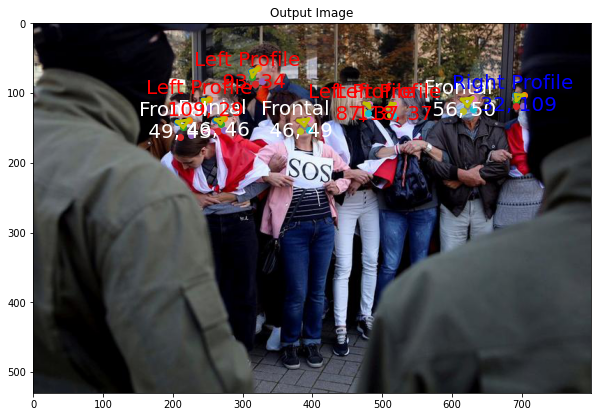

In [12]:
predFacePose("/Users/nawafalageel/Downloads/EiWh9kWXkAIodL5.jpg")